In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import chirp
from scipy.signal import spectrogram
from scipy.io import wavfile
import ipywidgets as widgets

#### Primer 1

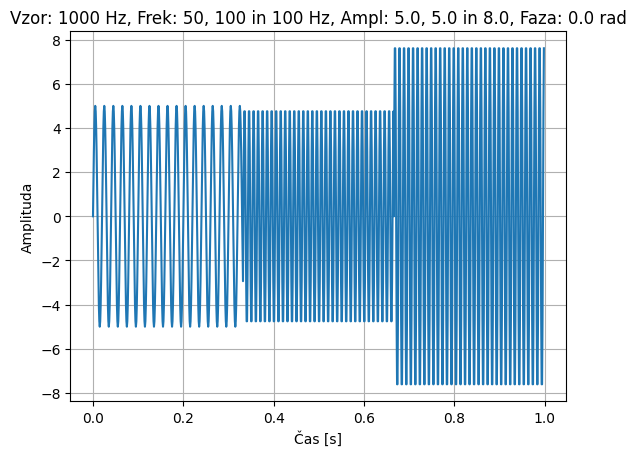

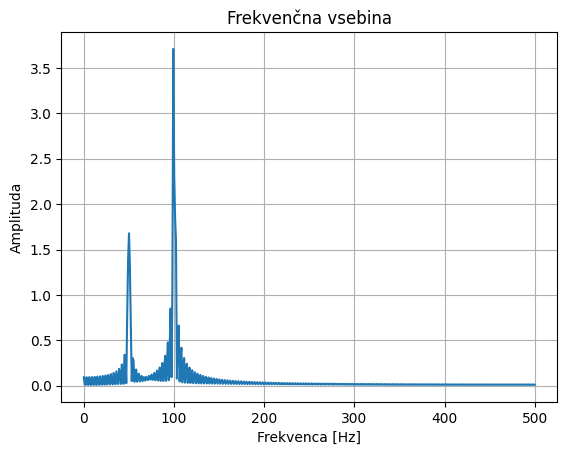

In [6]:
# Frekvenčna analiza
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 50                      # frekvenca 1 [Hz]
freq2 = 100                     # frekvenca 2 [Hz]
freq3 = 100                     # frekvenca 3 [Hz]
A1 = 5.0                        # amplituda 1
A2 = 5.0                        # amplituda 2
A3 = 8.0                        # amplituda 3
p = 0.0                         # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A1*np.sin(2*np.pi*freq1*t+p)
y2 = A2*np.sin(2*np.pi*freq2*t+p)
y3 = A3*np.sin(2*np.pi*freq3*t+p)

# Združeni signali - ne pazimo na spektralno prepuščanje
yc = np.concatenate((y1[:round(N/3)], y2[:round(N/3)], y3[:round(N/3)]))

# Izris
plt.plot(t[:len(yc)], yc)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1}, {freq2} in {freq3} Hz, Ampl: {A1}, {A2} in {A3}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Yc = np.fft.fft(yc)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Yc[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Izvedba FFT nam daje samo informacijo kako je zgrajen generiran signal.
# Tako imamo samo informacijo, da so frekvence prisotne v signali,
# ne vemo pa kdaj so prisotne - ali so prisotne ves čas signala.
# Kaj pa amplituda?

#### Primer 2

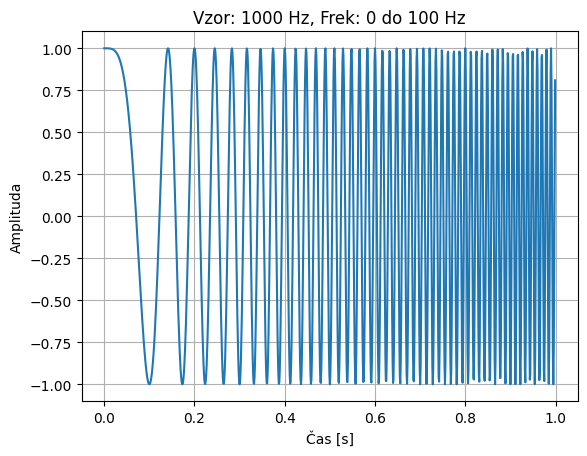

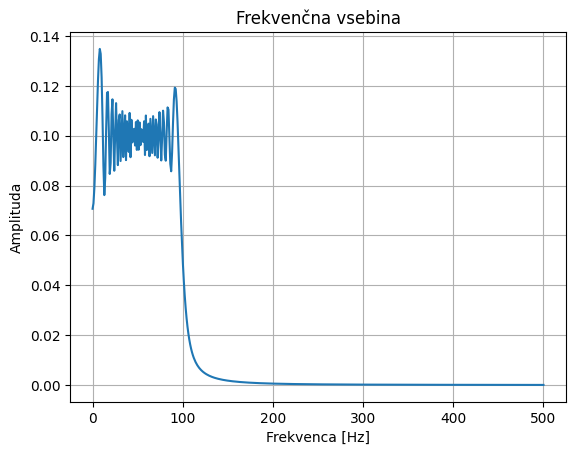

In [7]:
# Čirik
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freqs = 0                       # zažetna frekvenca [Hz]
freqe = 100                     # končna frekvenca [Hz]

# Čirik
y = chirp(t, f0=freqs, f1=freqe, t1=T, method='linear')

# Izris
plt.plot(t, y)
plt.title(f'Vzor: {Fs} Hz, Frek: {freqs} do {freqe} Hz')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Y = np.fft.fft(y)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Y[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Kaj lahko rečemo glede frekvenčne vsebine?

#### Primer 3

Da bi spreminjanje amplitud vseeno opazili, se lahko poslužimo **ST-DFT** (Short Time Discrete Fourier Transform).

Pri tej metodi celoten signal razdelimo na manjše odseke, ki se lahko med seboj prekrivajo ali pa tudi ne. Nad vsakim odsekom izvedemo DFT.

Rezultat lahko prikažemo v ČASOVNO-FREKVENČNI RAVNINI, ker označuje os x čas, os y pa frekvenco.
Delitev signala na odseke navadno dosežemo s okensko funkcijo, katere dožina mora biti krajša od samega signala. Okno nato zaporedno premikamo po signalu in računamo časovno-frekvenčno reprezentacijo.

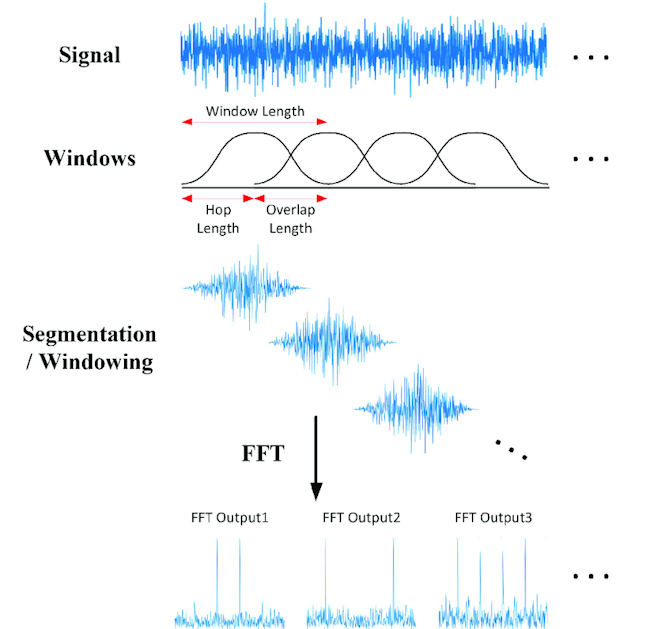

Za vsak odsek signala dobimo svoj graf. 
Za vsak graf poznamo njegovo časovno podporo, zato lahko več takšnih grafov združimo v spekrogram, kjer lahko vidimo amplitudo posameznih frekvenc v določenem časovnem intervalu.

(257, 30)
1.953125 == 1.953125


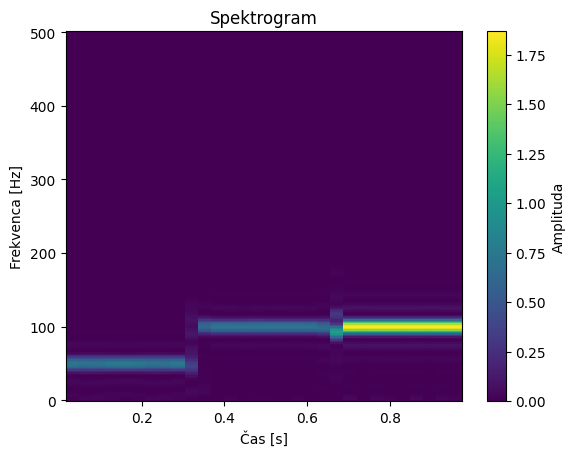

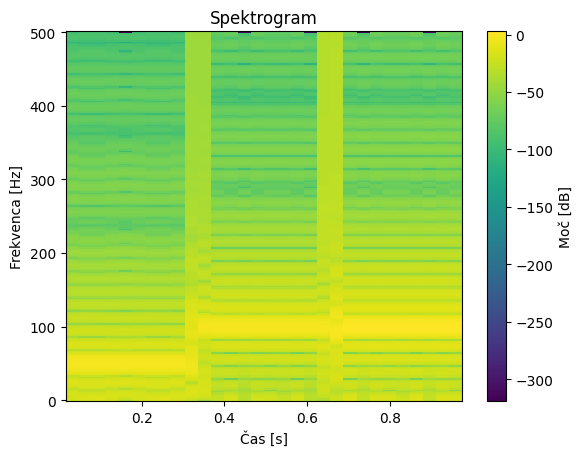

In [8]:
# Poglejmo spektrogram za prvi konkateniran signal
wi = 64    # širina okna - dolžina kosa signala [Vzorci]
ov = 32    # prekrivanje med okni [Vzorci] - pimerno je vzeti vsaj polovico vzorcev okna
nfft = 512 # število preiskovanih frekvenc - določa število frekvenc s katerimi v DFT-ju tipamo signal

fr, ti, sp = spectrogram(yc, Fs, nperseg=wi, noverlap=ov, nfft=nfft)

# Spektrogram vrne matriko sp, kjer so v stolpcih
# zapisane frekvenčne transformiranke posamezenih odsekov signala.

print(np.shape(sp))

# Kako pridemo do velikosti matrike?

# V vektorju fr je zapisano katero frekvenco predstavlja 
# posamezna vrstica v matriki sp.

# Kako pridemo do širine frekvenčnega razdelka?
print(f"{fr[1]} == {Fs/nfft}")

# Vektor ti vsebuje začetne časovne pozicije okna za posamezni odsek 
# signala (torej čas prvega vzorca v odseku).

# Izris spektrograma
plt.pcolormesh(ti, fr, np.abs(sp), shading='auto') # gouraud
plt.title('Spektrogram')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.colorbar(label='Amplituda')
plt.show()

# Na sliki lahko vidimo spekrogram signala.
# Vidimo, da nam os X predstavlja čas, os Y pa frekvenco.
# Amplituda signala ob določenem času in določeni frekvenci je ponazorjena z barvo.
# Interpretacija spektrograma zahteva zmerno stopnjo previdnosti, saj velja princip nedoločenosti frekvenčne in časovne ločljivosti.

# Logaritemska skala
# Gostota močnostnega spektra - Power Spectral Density (PSD)
plt.pcolormesh(ti, fr, 10 * np.log10(sp), shading='auto') # gouraud
plt.title('Spektrogram')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.colorbar(label='Moč [dB]')
plt.show()

#### Primer 4

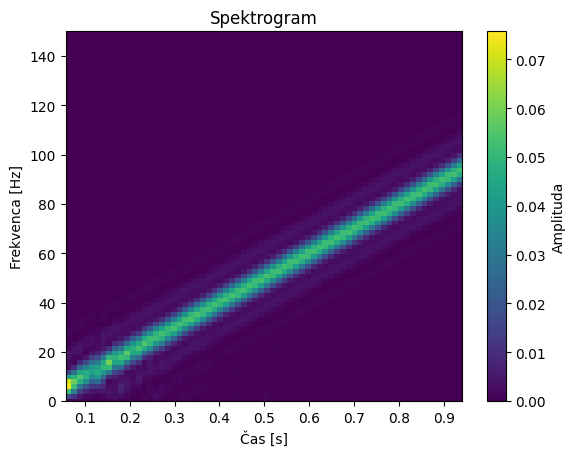

In [9]:
# Spektrogram za čirik
wi = 128   # širina okna - dolžina kosa signala [Vzorci]
ov = 115   # prekrivanje med okni [Vzorci] - pimerno je vzeti vsaj polovico vzorcev okna
nfft = 512 # število preiskovanih frekvenc - določa število frekvenc s katerimi v DFT-ju tipamo signal

fr, ti, sp = spectrogram(y, Fs, nperseg=wi, noverlap=ov, nfft=nfft)

# Izris spektrograma
plt.pcolormesh(ti, fr, abs(sp), shading='auto') # gouraud
plt.title('Spektrogram')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvenca [Hz]')
plt.colorbar(label='Amplituda')
plt.ylim(0, 150)
plt.show()

#### Primer 5

In [10]:
# Kako močno vrednost nfft vpliva na analizo
Fs = 1000                       # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 50                      # frekvenca 1 [Hz]
freq2 = 100                     # frekvenca 2 [Hz]
freq3 = 100                     # frekvenca 3 [Hz]
A1 = 5.0                        # amplituda 1
A2 = 5.0                        # amplituda 2
A3 = 8.0                        # amplituda 3
p = 0.0                         # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A1*np.sin(2*np.pi*freq1*t+p)
y2 = A2*np.sin(2*np.pi*freq2*t+p)
y3 = A3*np.sin(2*np.pi*freq3*t+p)

# Združeni signali - ne pazimo na spektralno prepuščanje
yc = np.concatenate((y1[:round(N/3)], y2[:round(N/3)], y3[:round(N/3)]))

def widget_spectrogram(nfft):
    fr, ti, sp = spectrogram(yc, Fs, nperseg=wi, noverlap=ov, nfft=nfft)

    plt.figure(figsize=(12, 4))

    # Frekvenčna vsebina
    plt.subplot(1, 2, 1)
    plt.plot(fr, sp[:, 0])   # Izberemo en časovni trenutek
    plt.plot(fr, sp[:, 32])  # Izberemo en časovni trenutek
    plt.xlabel('Frekvenca [Hz]')
    plt.ylabel('Amplituda')
    plt.title(f"Frekvenčna vsebina nfft: {nfft}")
    plt.grid()

    # Spektrogram
    plt.subplot(1, 2, 2)
    plt.pcolormesh(ti, fr, sp, shading="auto")
    plt.xlabel('Čas [s]')
    plt.ylabel('Frekvenca [Hz]')
    plt.title(f"Spektrogram nfft: {nfft}")
    plt.colorbar(label="Amplituda")

    plt.tight_layout()
    plt.show()

# Interaktivni vmesnik
widgets.interact(widget_spectrogram, nfft=widgets.IntSlider(min=128, max=768, step=32, value=128))

interactive(children=(IntSlider(value=128, description='nfft', max=768, min=128, step=32), Output()), _dom_cla…

<function __main__.widget_spectrogram(nfft)>

#### Primer 6

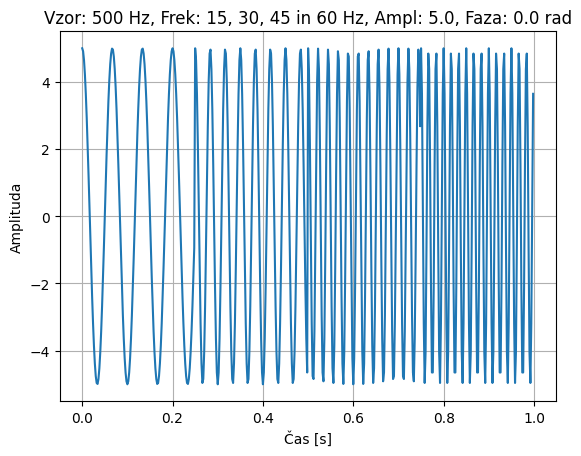

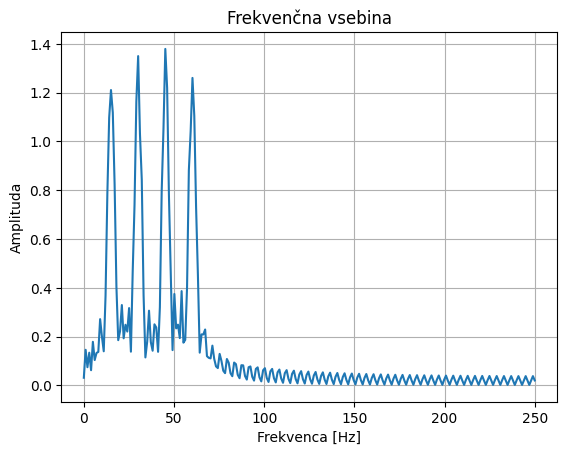

In [11]:
# Frekvenčna in časovna ločljivost
Fs = 500                        # vzorčevalna frekvenca [Hz] - število "točk" na sekundo
T = 1.0                         # dolžina vzorcev - signala [s]
t = np.arange(0, T, (1.0 / Fs)) # točke vzorčenja - časovni vektor
freq1 = 15                      # frekvenca 1 [Hz]
freq2 = 30                      # frekvenca 2 [Hz]
freq3 = 45                      # frekvenca 3 [Hz]
freq4 = 60                      # frekvenca 4 [Hz]
A = 5.0                         # amplituda
p = 0.0                         # faza [rad]
N = len(t)                      # število vzorcev v signalu

# Signali
y1 = A*np.cos(2*np.pi*freq1*t+p)
y2 = A*np.cos(2*np.pi*freq2*t+p)
y3 = A*np.cos(2*np.pi*freq3*t+p)
y4 = A*np.cos(2*np.pi*freq4*t+p)

# Združeni signali - ne pazimo na spektralno prepuščanje
yc = np.concatenate((y1[:round(N/4)], y2[:round(N/4)], y3[:round(N/4)], y4[:round(N/4)]))

# Izris
plt.plot(t[:len(yc)], yc)
plt.title(f'Vzor: {Fs} Hz, Frek: {freq1}, {freq2}, {freq3} in {freq4} Hz, Ampl: {A}, Faza: {p} rad')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# FFT
Yc = np.fft.fft(yc)

# Frekvenčni razdelki za risanje X osi
x = np.linspace(0, Fs/2, N//2)

# Amplitude
ampl = 2*abs(Yc[:N//2])

plt.plot(x, ampl/N)
plt.title(f'Frekvenčna vsebina')
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

In [12]:
# Frekvenčna in časovna ločljivost
# Kako širina okna vpliva na analizo?

def widget_spectrogram(wi):
    nfft = 512               # število preiskovanih frekvenc 
    ov = round((wi*75)/100); # prekrivanje med okni [75%]

    fr, ti, sp = spectrogram(yc, Fs, nperseg=wi, noverlap=ov, nfft=nfft)

    plt.figure(figsize=(12, 4))

    # Spektrogram
    plt.subplot(1, 2, 2)
    plt.pcolormesh(ti, fr, sp, shading="auto")
    plt.xlabel('Čas [s]')
    plt.ylabel('Frekvenca [Hz]')
    plt.title(f"Spektrogram wi: {wi} ov: {ov}")
    plt.colorbar(label="Amplituda")
    plt.ylim(0, 150)

    plt.tight_layout()
    plt.show()

# Interaktivni vmesnik
widgets.interact(widget_spectrogram, wi=widgets.IntSlider(min=50, max=400, step=50, value=50))

# Z ožjim oknom lažje prepoznamo čas, pri katerem se spremeni frekvenca, ampak težje natančno določimo frekvenco.
# Obratno, s širšim oknom lažje natančneje določimo frekvenco, dobimo pa zamegljen čas, kjer se zgodi sprememba frekvence.

interactive(children=(IntSlider(value=50, description='wi', max=400, min=50, step=50), Output()), _dom_classes…

<function __main__.widget_spectrogram(wi)>

#### Primer 7

Predvajanje...
Končano


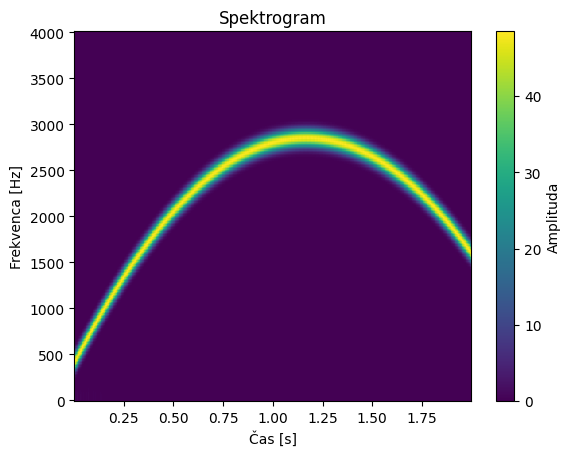

Predvajanje...
Končano


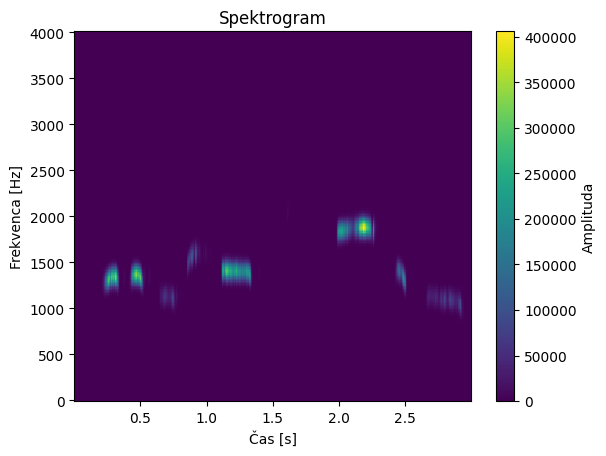

Predvajanje...
Končano


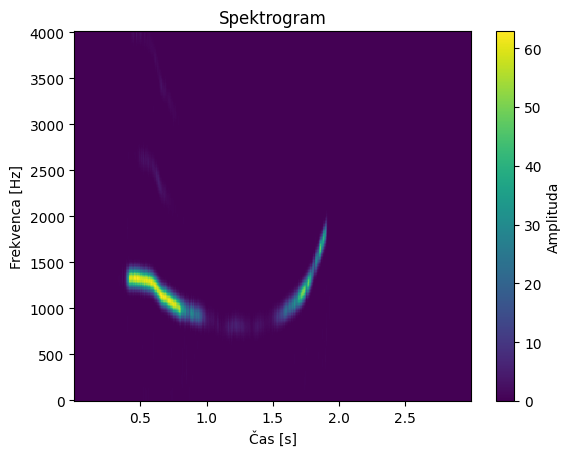

In [13]:
# Zvoki
wi = 64    # širina okna - dolžina kosa signala [Vzorci]
ov = 32    # prekrivanje med okni [Vzorci] - pimerno je vzeti vsaj polovico vzorcev okna
nfft = 512 # število preiskovanih frekvenc - določa število frekvenc s katerimi v DFT-ju tipamo signal

files = ['Sinus.wav', 'Zvizganje.wav', 'Zvizganje2.wav']

for i in range(0, len(files)):
    Fs, y = wavfile.read(files[i])

    if len(y.shape) == 2:
        y = y[:, 0]

    # Predvajamo zvok
    print("Predvajanje...")
    sd.play(y, Fs)
    sd.wait()
    print("Končano")

    fr, ti, sp = spectrogram(y, Fs, nperseg=wi, noverlap=ov, nfft=nfft, window='hamming')

    # Izris spektrograma
    plt.pcolormesh(ti, fr, np.abs(sp), shading='auto') # gouraud
    plt.title('Spektrogram')
    plt.xlabel('Čas [s]')
    plt.ylabel('Frekvenca [Hz]')
    plt.colorbar(label='Amplituda')
    plt.show()